In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

print("Pandas Version: " + pd.__version__)
print("Numpy Version: " + np.__version__)

Pandas Version: 1.1.2
Numpy Version: 1.19.2


In [162]:
trips = pd.read_csv("../data/clean/trips.csv", parse_dates=['date_from', 'date_until'])

In [163]:
trips.head()

,bike_id,user_id,date_from,date_until,from_station_name,from_station_id,to_station_name,to_station_id,booked_via,duration_in_min
0,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,U-Bahn Baumwall,214170,Mönckebergstraße / Rosenstraße,131880,iPhone SRH,16
1,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,Bahnhof Altona Ost/Max-Brauer-Allee,131646,Schulterblatt/Eifflerstraße,131648,Android SRH,18
2,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,Weidestraße/Biedermannplatz,211922,Jarrestraße / Rambatzweg,138376,Techniker HH_119 (-2334-),13
3,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,Mundsburg / Schürbeker Straße,140799,Bartholomäusstraße/Beim Alten Schützenhof,211923,iPhone SRH,8
4,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,Krausestraße/Eilbektal,208295,Lortzingstraße/Friedrichsberger Straße,213833,iPhone SRH,4


In [164]:
stations = pd.read_csv("../data/clean/stations.csv")

In [165]:
stations.head()

,station_name
0,Allende-Platz/Grindelhof
1,Alsenstraße/Düppelstraße
2,Alsterdorf Markt/Evangelische Stiftung
3,Alsterdorfer Straße/Fuhlsbüttler Straße
4,Alsterschwimmhalle/Ifflandstraße


In [166]:
weather = pd.read_csv("../data/clean/weather.csv", index_col=0, parse_dates=['datetime'])

In [167]:
weather.head()

,precip_intensity,precip_probability,precip_type,temperature,humidity,wind_speed,wind_bearing,uv_index,visibility,pressure
datetime,,,,,,,,,,
2014-01-01 00:00:00+01:00,0.0,0.0,none,1.93,0.81,3.91,161.0,0.0,9.988,1010.0
2014-01-01 01:00:00+01:00,0.0,0.0,none,1.94,0.85,4.56,140.0,0.0,6.004,1010.0
2014-01-01 02:00:00+01:00,0.0,0.0,none,1.81,0.85,4.12,143.0,0.0,9.988,1010.0
2014-01-01 03:00:00+01:00,0.0,0.0,none,1.75,0.81,3.70,154.0,0.0,9.988,1010.0
2014-01-01 04:00:00+01:00,0.0,0.0,none,1.72,0.82,4.36,149.0,0.0,9.988,1010.0


### Counting check-ins and check-outs per station per hour

In [168]:
trips_slice = trips[['date_from', 'date_until', 'from_station_name', 'to_station_name']].copy()

In [169]:
check_ins = trips_slice.groupby([pd.Grouper(key='date_until', freq='H'), 'to_station_name']).size().to_frame('check_ins')
check_ins.index.rename(['datetime', 'station_name'], inplace=True)
check_ins

check_ins
datetime            station_name                                      
2014-01-01 00:00:00 Alsenstraße/Düppelstraße                         3
                    Amsinckstraße/ Nordkanalbrücke                   2
                    Bahnhof Altona West / Busbahnhof                 1
                    Bahnhof Dammtor Süd / Marseiller Straße          1
                    Bebelallee/Meenkwiese                            2
...                                                                ...
2017-05-16 08:00:00 Versmannstraße/Am Hannoverschen Bahnhof          1
                    Wandsbeker Chaussee/ Börnestraße                 1
                    Weidestraße /Johannes-Prassek-Park               1
                    Wentorfer Straße/Bezirksamt Bergedorf            1
                    Winterhuder Weg/ Zimmerstraße                    1

[2444453 rows x 1 columns]

In [170]:
check_outs = trips_slice.groupby([pd.Grouper(freq='H', key='date_from'), 'from_station_name']).size().to_frame('check_outs')
check_outs.index.rename(['datetime', 'station_name'], inplace=True)
check_outs

check_outs
datetime            station_name                                           
2014-01-01 00:00:00 Allende-Platz/Grindelhof                              5
                    Auf dem Sande/Kehrwieder-MiniaturWunderland           2
                    Bahnhof Altona Ost/Max-Brauer-Allee                   3
                    Bahnhof Altona West / Busbahnhof                      2
                    Bahnhof Dammtor Nord // Theodor-Heuss-Platz           2
...                                                                     ...
2017-05-16 08:00:00 Landungsbrücke/Hafentor                               1
                    Lappenbergsallee / Bei der Apostelkirche              1
                    Moorstraße/Bahnhof Harburg                            1
                    Mönckebergstraße / Steintorwall                       1
                    Osdorfer Landstraße/ Elbe-Einkaufszentrum             1

[2428152 rows x 1 columns]

### Create empty data set with stats per station per hour and fill in accumulated data

In [171]:
from datetime import datetime

# create date range
start_date = datetime(2014, 1, 1, 0)
end_date = datetime(2017, 5, 16, 8)
date_range = pd.date_range(start_date, end_date, freq='H')

station_names = sorted(stations.station_name.values)

# create multiindex from hourly timestamps and station names
index = pd.MultiIndex.from_product([date_range, station_names], names=['datetime', 'station_name'])

# create empty data set with index
empty_df = pd.DataFrame(index=index)

# insert calculations and fill missing values with 0, meaning no check-outs or check-ins observed
station_count = empty_df.join(check_ins).join(check_outs).fillna(0)
station_count.check_ins = station_count.check_ins.astype(int)
station_count.check_outs = station_count.check_outs.astype(int)

# calculate change in bike inventory
station_count['diff'] = (station_count['check_ins'] - station_count['check_outs'])

station_count.head(10)

check_ins  check_outs  \
datetime   station_name                                                         
2014-01-01 Allende-Platz/Grindelhof                             0           5   
           Alsenstraße/Düppelstraße                             3           0   
           Alsterdorf Markt/Evangelische Stiftung               0           0   
           Alsterdorfer Straße/Fuhlsbüttler Straße              0           0   
           Alsterschwimmhalle/Ifflandstraße                     0           0   
           Alter Postweg / Heimfelder Straße                    0           0   
           Alter Wall/Adolphsbrücke                             0           0   
           Am Kaiserkai/Großer Grasbrook                        0           0   
           Amsinckstraße/ Nordkanalbrücke                       2           0   
           Auf dem Sande/Kehrwieder-MiniaturWunderland          0           2   

                                                        diff  
datetime   station_name                                       
2014-01-01 Allende-Platz/Grindelhof                       -5  
           Alsenstraße/Düppelstraße                        3  
           Alsterdorf Markt/Evangelische Stiftung          0  
           Alsterdorfer Straße/Fuhlsbüttler Straße         0  
           Alsterschwimmhalle/Ifflandstraße                0  
           Alter Postweg / Heimfelder Straße               0  
           Alter Wall/Adolphsbrücke                        0  
           Am Kaiserkai/Großer Grasbrook                   0  
           Amsinckstraße/ Nordkanalbrücke                  2  
           Auf dem Sande/Kehrwieder-MiniaturWunderland    -2

In [172]:
station_count.to_csv("../data/station_count.csv")

<AxesSubplot:xlabel='datetime'>

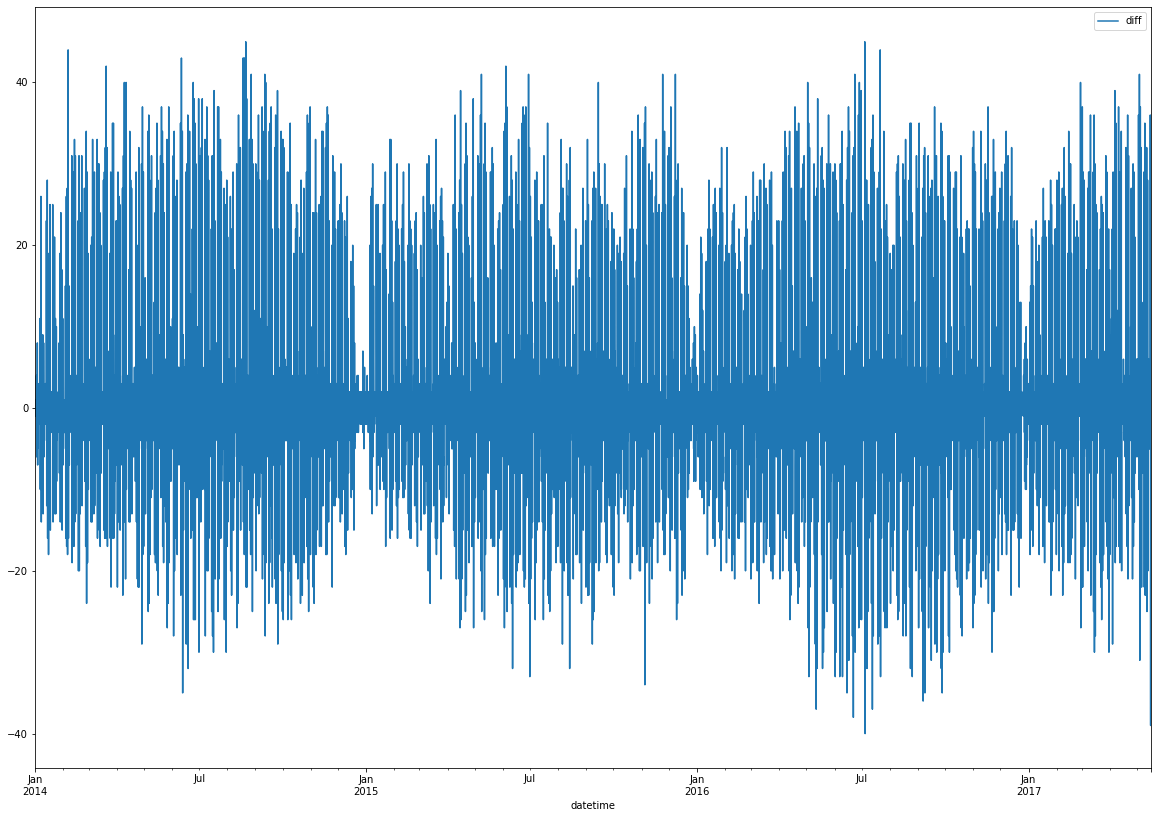

In [136]:
test_slice = foo.xs('Am Kaiserkai/Großer Grasbrook', level='station_name')
test_slice.plot(y='diff', figsize=(20,14))

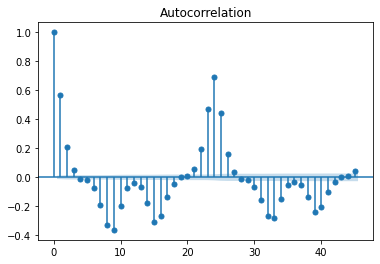

In [137]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(test_slice[['diff']])
plt.show()

In [154]:
# ARIMA
model = sm.tsa.arima.ARIMA(test_slice[['diff']], order=(5,1,0))
model_fit = model.fit()

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [160]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                29553
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -94737.513
Date:                Fri, 25 Sep 2020   AIC                         189487.027
Time:                        15:21:15   BIC                         189536.790
Sample:                    01-01-2014   HQIC                        189503.005
                         - 05-16-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1914      0.004    -51.443      0.000      -0.199      -0.184
ar.L2         -0.3039      0.005    -63.696      0.000      -0.313      -0.295
ar.L3         -0.2140      0.006    -34.903      0.000      -0.226      -0.202
ar.L4         -0.1802      0.006    -31.198      0.000      -0.191      -0.169
ar.L5         -0.0501      0.006     -8.169      0.000      -0.062      -0.038
sigma2        35.6536      0.140    254.334      0.000      35.379      35.928
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             64096.10
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""